In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from datetime import datetime
import pandas as pd

def calculate_mean_gray(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Calculate and return the mean gray value
    return np.mean(img)

# Specify the directory where the images are located
image_dir = "data/2024-23"

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

image_files = sorted(image_files)

In [23]:
mean_gray_values = [calculate_mean_gray(image_file) for image_file in image_files]

In [22]:
dates = [datetime.strptime(os.path.basename(f).split('.')[0], '%Y-%m-%d-%H-%M').date().isoformat() for f in image_files]

# Specify your timezone
timezone = 'AMS'  # Adjust this value as needed

# Create a DataFrame
df = pd.DataFrame({
    'date': dates,
    'mean_gray_value': mean_gray_values,
    'timezone': timezone
})

# Write the DataFrame to a CSV file
df.to_csv('mean_gray_values.csv', index=False)

ValueError: All arrays must be of the same length

In [17]:
mean_gray_values = [calculate_mean_gray(image_file) for image_file in image_files]

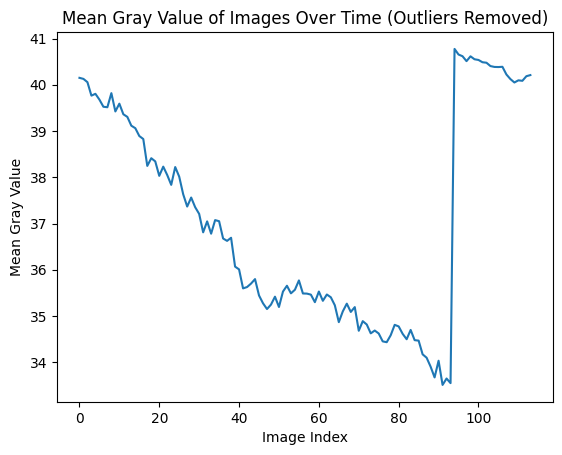

In [18]:
# Calculate Q1, Q3 and IQR
Q1 = np.percentile(mean_gray_values, 25)
Q3 = np.percentile(mean_gray_values, 75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 0.2 * IQR
upper_bound = Q3 + 0.2 * IQR

# Remove outliers
filtered_gray_values = [x for x in mean_gray_values if lower_bound <= x <= upper_bound]

# Plot the filtered gray values
plt.plot(filtered_gray_values)
plt.title('Mean Gray Value of Images Over Time (Outliers Removed)')
plt.xlabel('Image Index')
plt.ylabel('Mean Gray Value')
plt.show()